### Stitching raster images with Mosaic

In [3]:
from sentinelsat import SentinelAPI
sentinelAPI = SentinelAPI('username','password','https://scihub.copernicus.eu/dhus')

In [4]:
import geopandas as gpd # Read shape file
import folium # Visualize map
eth = gpd.read_file('ethiopia/POLYGON.shp')
ethMap = folium.Map([9.05, 38.76], zoom_start = 12)
folium.GeoJson(eth).add_to(ethMap)
ethMap

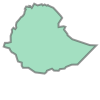

In [5]:
from shapely.geometry import MultiPolygon, Polygon # manipulation and analysis of planar objects

footprint = None
for fp in eth['geometry']:
    footprint = fp
    
footprint

In [6]:
from collections import OrderedDict

ethTiles = ['36NWP','36NXP', '36NXN']
tiles = ['37PBM']
# keyworded arguments
query_kwargs = {
    'platformname': 'Sentinel-2',
#     'producttype': 'S2MSI2A',
    'processinglevel': 'Level-1C',
    'cloudcoverpercentage': (0, 10),
    'date': ('20191101', '20191103')
}

products = OrderedDict()

for tile in ethTiles:
    kw = query_kwargs.copy()
    kw['tileid'] = tile
    product = sentinelAPI.query(**kw)
    products.update(product)


In [7]:
#dict of all products available in date period with query specification
products_gdf = sentinelAPI.to_geodataframe(products).sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf

,title,link,link_alternative,link_icon,summary,datatakesensingstart,beginposition,endposition,ingestiondate,orbitnumber,...,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,level1cpdiidentifier,uuid,geometry
317df8c4-1249-4e04-9ce6-78f1ccb10efa,S2A_MSIL1C_20191101T080051_N0208_R035_T36NXP_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-01T08:00:51.024Z, Instrument: MS...",2019-11-01 08:00:51.024,2019-11-01 08:00:51.024,2019-11-01 08:00:51.024,2019-11-01 13:19:34.973,22769,...,GS2A_20191101T080051_022769_N02.08,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_MSIL1C_20191101T080051_N0208_R035_T36NXP_2...,S2A_OPER_MSI_L1C_TL_EPAE_20191101T093015_A0227...,317df8c4-1249-4e04-9ce6-78f1ccb10efa,"MULTIPOLYGON (((34.89974 7.14490, 34.90413 8.1..."
930d9cb0-f0d5-42da-a27f-59cf33cb7061,S2A_MSIL1C_20191101T080051_N0208_R035_T36NWP_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-01T08:00:51.024Z, Instrument: MS...",2019-11-01 08:00:51.024,2019-11-01 08:00:51.024,2019-11-01 08:00:51.024,2019-11-01 13:19:33.458,22769,...,GS2A_20191101T080051_022769_N02.08,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_MSIL1C_20191101T080051_N0208_R035_T36NWP_2...,S2A_OPER_MSI_L1C_TL_EPAE_20191101T093015_A0227...,930d9cb0-f0d5-42da-a27f-59cf33cb7061,"MULTIPOLYGON (((33.99419 7.14774, 33.99649 8.1..."
5bc8d9aa-30f3-475c-9ddd-aa7f8897b02f,S2A_MSIL1C_20191101T080051_N0208_R035_T36NXN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-01T08:00:51.024Z, Instrument: MS...",2019-11-01 08:00:51.024,2019-11-01 08:00:51.024,2019-11-01 08:00:51.024,2019-11-01 13:19:32.938,22769,...,GS2A_20191101T080051_022769_N02.08,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_MSIL1C_20191101T080051_N0208_R035_T36NXN_2...,S2A_OPER_MSI_L1C_TL_EPAE_20191101T093015_A0227...,5bc8d9aa-30f3-475c-9ddd-aa7f8897b02f,"MULTIPOLYGON (((34.89625 6.24115, 34.90011 7.2..."


In [71]:
type(products_gdf)
products_gdf['title']
pg = products_gdf
set(products_gdf)
products_gdf['uuid'][0]

'317df8c4-1249-4e04-9ce6-78f1ccb10efa'

In [80]:
for i in range(len(products_gdf)):
    print(products_gdf['uuid'][i])
    sentinelAPI.download(products_gdf['uuid'][i])

317df8c4-1249-4e04-9ce6-78f1ccb10efa


Downloading: 100%|██████████| 799M/799M [09:15<00:00, 1.44MB/s]  
MD5 checksumming: 100%|██████████| 799M/799M [00:01<00:00, 576MB/s] 


930d9cb0-f0d5-42da-a27f-59cf33cb7061


Downloading: 100%|██████████| 769M/769M [43:36<00:00, 294kB/s]    
MD5 checksumming: 100%|██████████| 769M/769M [00:01<00:00, 617MB/s] 


5bc8d9aa-30f3-475c-9ddd-aa7f8897b02f


Downloading:  50%|█████     | 401M/796M [15:26<15:14, 432kB/s]    


KeyboardInterrupt: 

In [102]:
sentinelAPI.download('5bc8d9aa-30f3-475c-9ddd-aa7f8897b02f')

Downloading: 100%|██████████| 796M/796M [13:21<00:00, 993kB/s] 
MD5 checksumming: 100%|██████████| 796M/796M [00:02<00:00, 268MB/s] 


{'id': '5bc8d9aa-30f3-475c-9ddd-aa7f8897b02f',
 'title': 'S2A_MSIL1C_20191101T080051_N0208_R035_T36NXN_20191101T093015',
 'size': 795829870,
 'md5': '9AEDC56DF8F84F74FB10836D477162BF',
 'date': datetime.datetime(2019, 11, 1, 8, 0, 51, 24000),
 'footprint': 'POLYGON((33.90580643657108 7.236926635409353,34.90010665686058 7.233863809027386,34.89624550513328 6.241154881060901,33.90396473340834 6.243793923572233,33.90580643657108 7.236926635409353))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('5bc8d9aa-30f3-475c-9ddd-aa7f8897b02f')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 11, 1, 13, 20, 4, 390000),
 'Ingestion Date': datetime.datetime(2019, 11, 1, 13, 19, 32, 938000),
 'path': './S2A_MSIL1C_20191101T080051_N0208_R035_T36NXN_20191101T093015.zip',
 'downloaded_bytes': 395273838}

In [9]:
'''
36nwp 36nxp
      36nxn
'''
import rasterio as rio
from rasterio.plot import show

In [10]:
import matplotlib.pyplot as plt

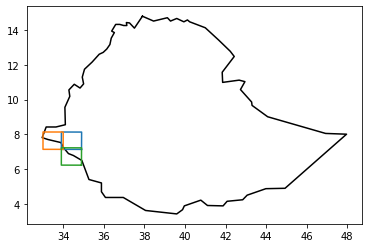

In [11]:
plt.plot(*footprint.exterior.xy, color='black')
for t in products_gdf['geometry']:
    plt.plot(*t[0].exterior.xy)

In [12]:
# function that computes normalized difference vegetation index
def compute_ndvi(nearInfraRed, red):
    redRead = red.read()
    nirRead = nearInfraRed.read()
    ndvi = ( nirRead.astype(float) - redRead.astype(float) ) / (nirRead + redRead)
    return ndvi

In [13]:
# taken from scipy tutorial 

from matplotlib import colors

# Credit: Joe Kington
class MidpointNormalize(colors.Normalize):
    """
    Normalize the colorbar so that diverging bars work there way either side from a prescribed midpoint value
    
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return numpy.ma.masked_array(numpy.interp(value, x, y), numpy.isnan(value))

In [14]:
import numpy
def visualize_ndvi(ndviRaster, name = 'NDVI'):
    minimum=numpy.nanmin(ndviRaster)
    maximum=numpy.nanmax(ndviRaster)
    # Set our custom midpoint for most effective NDVI analysis
    mid=0.1

    # Set your favorite diverging color scheme 
    # You can use https://matplotlib.org/users/colormaps.html as a reference
    colormap = plt.cm.RdYlGn 

    # Call MidPointNormalize with our min, max, and custom midpoint
    norm = MidpointNormalize(vmin=minimum, vmax=maximum, midpoint=mid)

    # Create a pyplot figure, in which we'll display our colorized NDVI
    fig = plt.figure(figsize=(20,10))

    # Add a subplot to our figure, which will contain the colorbar
    ax = fig.add_subplot(111)

    # Use 'imshow' to specify the input data, colormap, min, max, and norm for the colorbar
    cbar_plot = ax.imshow(ndviRaster[0], cmap=colormap, vmin=minimum, vmax=maximum, norm=norm)
    
    # Turn off the display of axis labels 
    ax.axis('off')

    # Set a title 
    ax.set_title('Normalized Difference Vegetation Index', fontsize=18, fontweight='bold')

    # Configure the colorbar
    cbar = fig.colorbar(cbar_plot, orientation='horizontal', shrink=0.65)

    # Call 'savefig' to save this plot to an image file
    fig.savefig(name + '.png', dpi=200, bbox_inches='tight', pad_inches=0.7)

    # Finally - let's take a look!
    plt.show()

### NDVI 36NWP

In [15]:
R10_36NWP = 'stitch/S2A_MSIL1C_20191101T080051_N0208_R035_T36NWP_20191101T093015.SAFE/GRANULE/L1C_T36NWP_A022769_20191101T080824/IMG_DATA'
red36NWP = rio.open(R10_36NWP+'/T36NWP_20191101T080051_B04.jp2') # red data b04
nir36NWP = rio.open(R10_36NWP+'/T36NWP_20191101T080051_B08.jp2') # near infrared data b08

ndvi36NWP = compute_ndvi(nir36NWP, red36NWP)

In [16]:
meta = red36NWP.meta
meta.update(driver = 'GTiff')
meta.update(dtype = rio.float32)

with rio.open('stitch/36NWP_NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi36NWP.astype(rio.float32))

In [33]:
def generate_ndvi(nir, red, name):
    computedNDVI = compute_ndvi(nir, red)
    meta = red.meta
    meta.update(driver = 'GTiff')
    meta.update(dtype = rio.float32)
    with rio.open('stitch/'+name+'.tif', 'w', **meta) as dst:
        dst.write(computedNDVI.astype(rio.float32))
    return dst

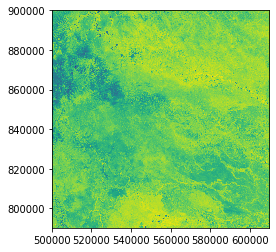

In [18]:
ndvi_36NWP = rio.open('stitch/36NWP_NDVI.tif')
show(ndvi_36NWP)

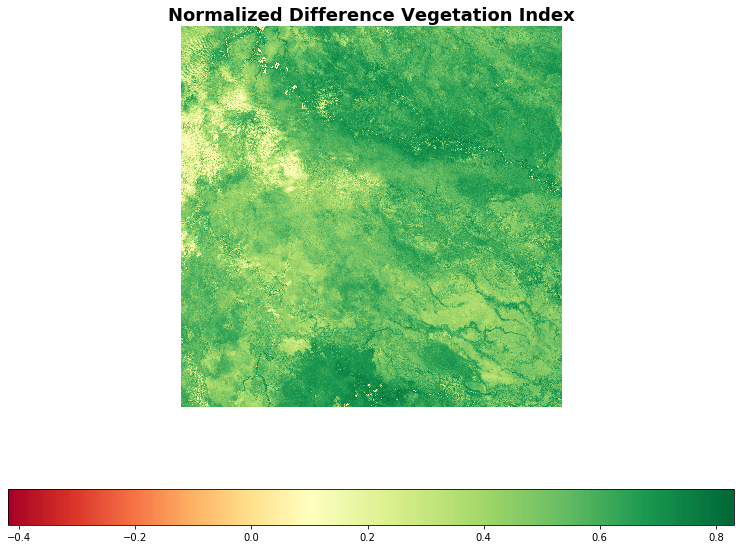

In [19]:
visualize_ndvi(ndvi36NWP, '36NWP_NDVI')

### NDVI 36NXP

In [20]:
R10_36NXP = 'stitch/S2A_MSIL1C_20191101T080051_N0208_R035_T36NXP_20191101T093015.SAFE/GRANULE/L1C_T36NXP_A022769_20191101T080824/IMG_DATA'
red36NXP = rio.open(R10_36NXP+'/T36NXP_20191101T080051_B04.jp2') # red data b04
nir36NXP = rio.open(R10_36NXP+'/T36NXP_20191101T080051_B08.jp2') # near infrared data b08

ndvi36NXP = compute_ndvi(nir36NXP, red36NXP)

In [21]:
meta = red36NXP.meta
meta.update(driver = 'GTiff')
meta.update(dtype = rio.float32)

with rio.open('stitch/36NXP_NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi36NXP.astype(rio.float32))

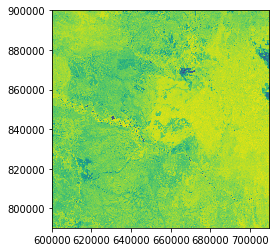

In [22]:
ndvi_36NXP = rio.open('stitch/36NXP_NDVI.tif')
show(ndvi_36NXP)

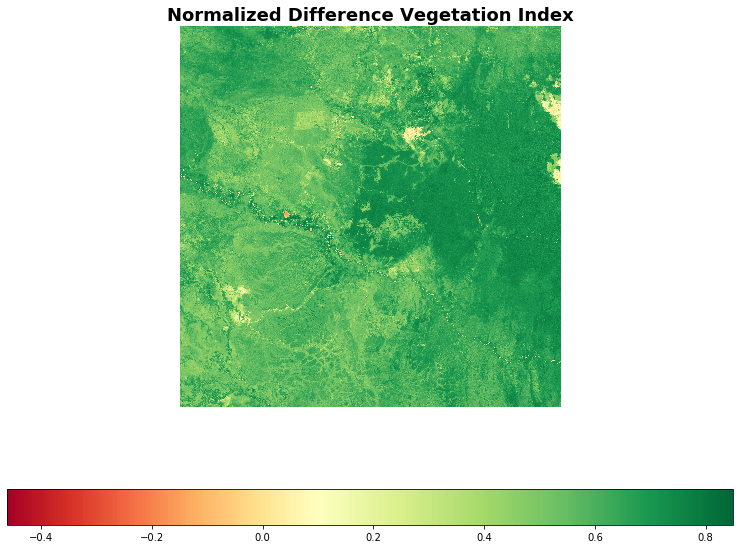

In [23]:
visualize_ndvi(ndvi36NXP, '36NXP_NDVI')

### NDVI 36NXN

In [24]:
R10_36NXN = 'stitch/S2A_MSIL1C_20191101T080051_N0208_R035_T36NXN_20191101T093015.SAFE/GRANULE/L1C_T36NXN_A022769_20191101T080824/IMG_DATA'
red36NXN = rio.open(R10_36NXN+'/T36NXN_20191101T080051_B04.jp2') # red data b04
nir36NXN = rio.open(R10_36NXN+'/T36NXN_20191101T080051_B08.jp2') # near infrared data b08

ndvi36NXN = compute_ndvi(nir36NXN, red36NXN)

In [25]:
meta = red36NXN.meta
meta.update(driver = 'GTiff')
meta.update(dtype = rio.float32)

with rio.open('stitch/36NXN_NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi36NXN.astype(rio.float32))

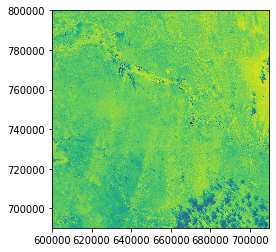

In [26]:
ndvi_36NXN = rio.open('stitch/36NXN_NDVI.tif')
show(ndvi_36NXN)

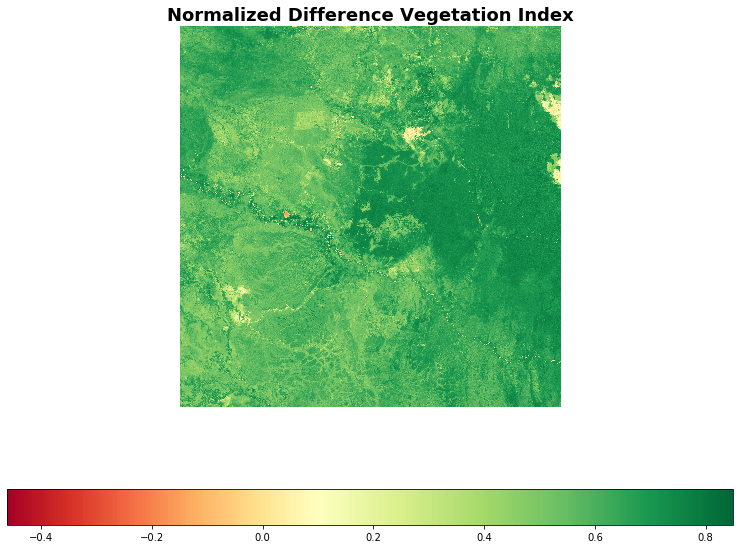

In [27]:
visualize_ndvi(ndvi36NXP, '36NXN_NDVI')

### Stitching with Mosaic

In [28]:
# Merge function returns a single mosaic array and the transformation info
from rasterio.merge import merge

def create_mosaic(*rasters):
    mosaic_files = []
    for raster in rasters:
        mosaic_files.append(raster)
    return merge(mosaic_files) # returns [mosaic, out_trans]

In [29]:
mosaic, out_trans = create_mosaic(ndvi_36NWP, ndvi_36NXP, ndvi_36NXN)

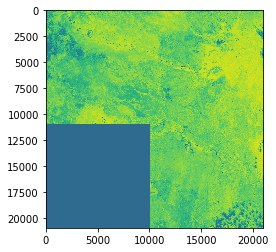

In [30]:
show(mosaic)

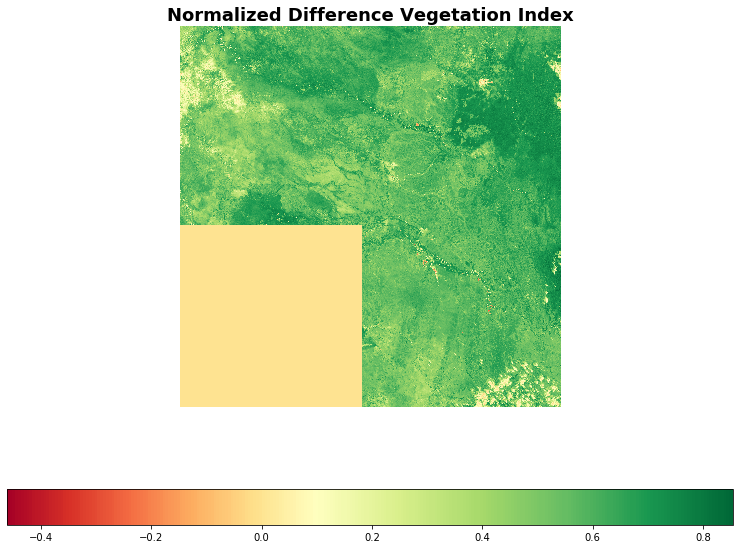

In [31]:
visualize_ndvi(mosaic, 'mosaic_NDVI')